### Logistic Regression Example 1.1
The approach results in a model for $P(default=Yes \,|\, balance )$ as depicted(blue line). The probability  

\begin{equation}
P( default=Yes | balance ) = p(Y = 1|X)
\end{equation}
is plotted against the monthly credit card bill (**balance**) $X$. The probabilities of the observed values are given by 
the $0/1$-Coding of the **default** variable: if **default=Yes** we have $p(X)=1$ (green dots) and in case **default=No** we have $p(X)=0$ (red dots).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load data
df = pd.read_csv('./data/Default.csv', sep=';')

# Add a numerical column for default
df = df.join(pd.get_dummies(df['default'], 
                            prefix='default', 
                            drop_first=True))

# Index of Yes:
i_yes = df.loc[df['default_Yes'] == 1, :].index

# Random set of No:
i_no = df.loc[df['default_Yes'] == 0, :].index
i_no = np.random.choice(i_no, replace=False, size=333)

# Fit Linear Model, only including the selection of no
i_ = np.concatenate((i_no, i_yes))
x = df.iloc[i_]['balance']
y = df.iloc[i_]['default_Yes']

x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()

# Find the predicted values
x_pred = x.sort_values()
y_pred = model.predict(sm.add_constant(x_pred))

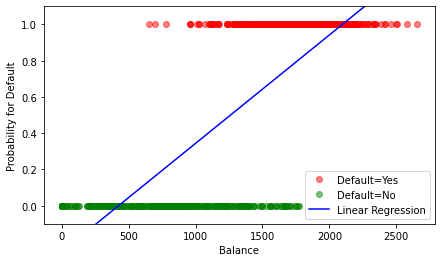

In [2]:
""" Plot """
# Create Figure and subplots
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)
# Plot datapoints
plt.plot(df.iloc[i_yes]['balance'], df.iloc[i_yes]['default_Yes'],
         'or', alpha=0.5, label='Default=Yes')
plt.plot(df.iloc[i_no]['balance'], df.iloc[i_no]['default_Yes'], 
         'og', alpha=0.5, label='Default=No')
# Plot fit
plt.plot(x_pred, y_pred, 'b-', label='Linear Regression')
# Labels and limits
ax.set_xlabel('Balance')
ax.set_ylabel('Probability for Default')
ax.set_ylim(-0.1, 1.1)
plt.legend()

plt.show()               

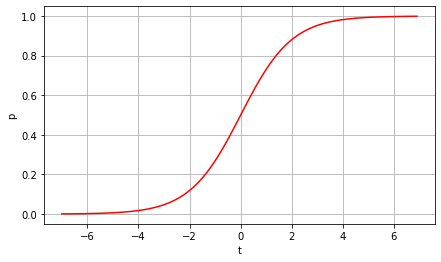

In [3]:
# Define t and p
t = np.arange(-7, 7, 0.1)
p = []
for i in range(len(t)):
    p.append(np.exp(t[i]) / (1 + np.exp(t[i])))

# Plot graph
# Create Figure and subplots
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)
plt.plot(t, p, 'r-')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('p')
plt.show()

Note that the linear function of the model returns negative values for low **balance** and values greater than $1$ for high **balance**. These values are not interpretable as probabilities, since those are bounded between $0$ and $1$. 

Also note that only a part of the **data** was included. The full data contains many more **default = No** entries, which would result in a much lower probability for default. 
